Traffic Data Time-Series Analysis

# Introduction

* What can we find about national trends in reference to accidents?
* What does the next year look like as far as traffic accidents are concerned?
* In what direction is Houston trending?

## Read in libraries

In [108]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                
warnings.filterwarnings('ignore')

%matplotlib inline


## Update settings for notebook

In [109]:
#Set options for pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#Set style for visualizations
plt.style.use('ggplot')

## Read in Data

In [110]:
#Set path to raw data location
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\US-Accidents A Countrywide Traffic Accident Dataset\Data\03_Processed'

#Timestamp variables to parse
dates = []

#Read in data
df = pd.read_csv(path + '/2020_0128_Processed_Traffic_Data_for_TSA.csv', index_col=0, low_memory=False)




## Preview data

In [111]:
#Print data shape
print('Data shape: ', df.shape)

display(df.head())

Data shape:  (2974336, 6)


,ID,Severity,Start_Weekday,Start_Day,Start_Month,Start_Year
Start_Time,,,,,,
2016-02-08 05:46:00,A-1,Three,Monday,8,2,2016
2016-02-08 06:07:59,A-2,Two,Monday,8,2,2016
2016-02-08 06:49:27,A-3,Two,Monday,8,2,2016
2016-02-08 07:23:34,A-4,Three,Monday,8,2,2016
2016-02-08 07:39:07,A-5,Two,Monday,8,2,2016


In [112]:
print('Column data types are as follows:\n', df.dtypes)

Column data types are as follows:
 ID               object
Severity         object
Start_Weekday    object
Start_Day         int64
Start_Month       int64
Start_Year        int64
dtype: object


# Time-Series Analysis

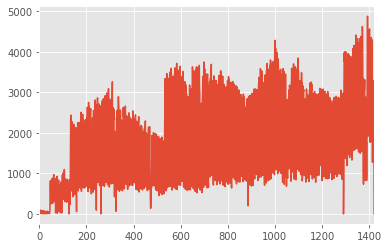

In [149]:
 df.groupby(['Start_Year', 'Start_Month','Start_Day'])['ID'].size().reset_index().ID.plot()

### Raw data and rolling average

Text(0.5, 1.0, 'Weekly Number of Traffic Accidents Across the US')

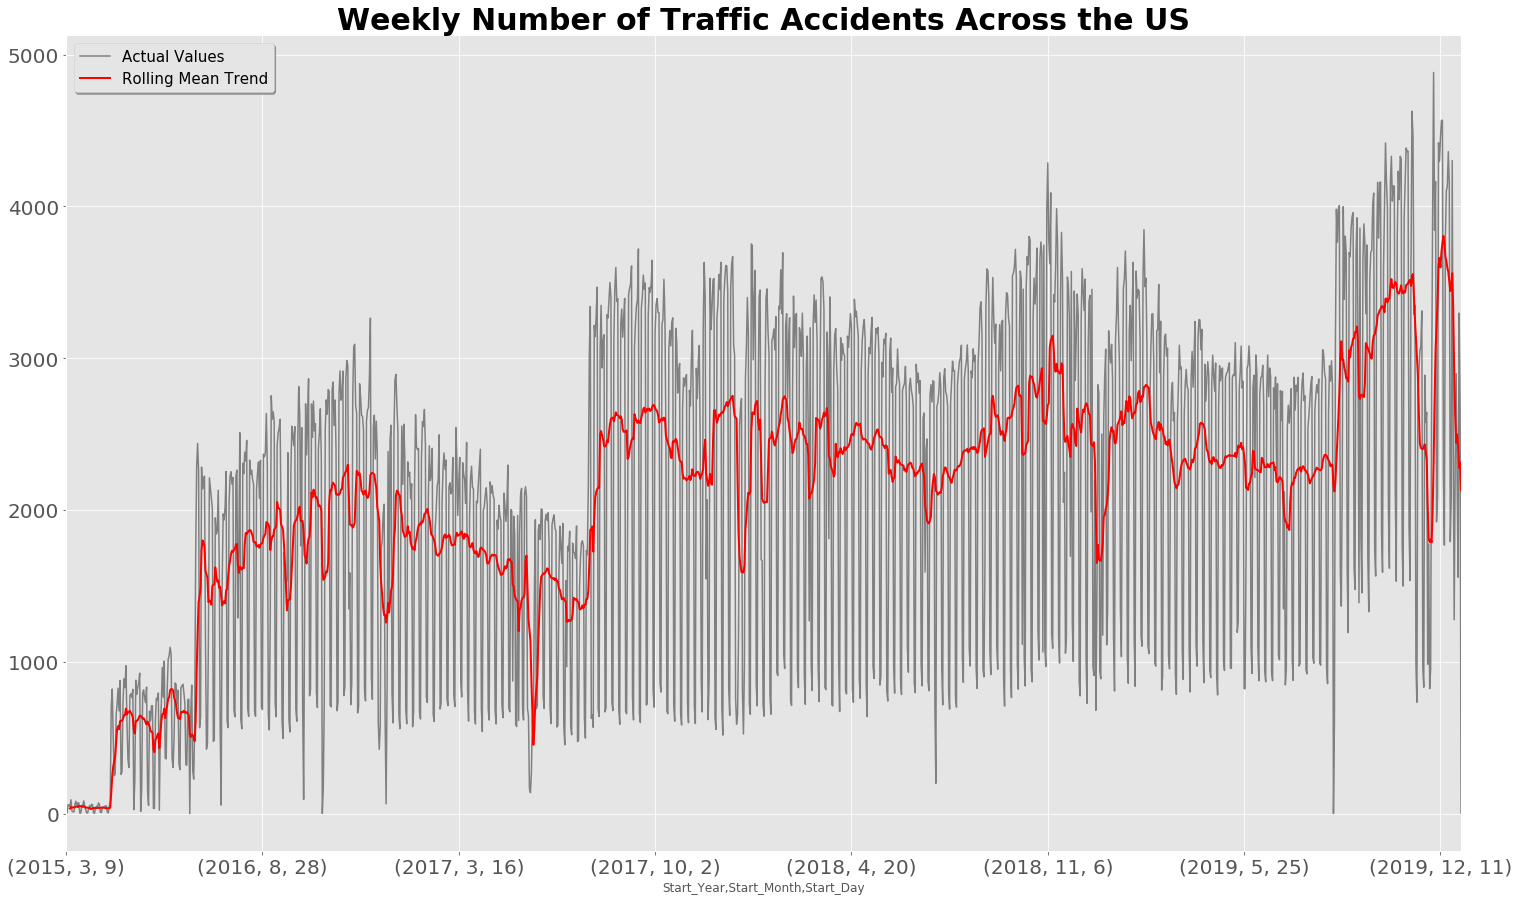

In [138]:
plt1 = df.groupby(['Start_Year', 'Start_Month','Start_Day'])['ID'].count().plot(
                                                                kind = 'line', figsize = (45,15), label = 'Actual Values',
                                                                color = 'grey', fontsize = 20)                                                               )

#Smoothing by rolling average(window size = 7)
df.groupby(['Start_Year', 'Start_Month','Start_Day'])['ID'].count().rolling(7, min_periods = 5).mean().plot(
                                                                    kind = 'line', figsize = (25,15), label = 'Rolling Mean Trend',linewidth = 2,
                                                                   color = 'red',
                                                                    ax=plt1)

plt1.legend(frameon = True, shadow = True,fontsize = 15)
plt1.set_title('Weekly Number of Traffic Accidents Across the US',fontsize = 30, fontweight = 'bold')

# Time-Series Analysis

### Moving average

Ideally, we want to have a stationary time series for modeling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

How to test if a process is stationary

You may have noticed in the title of the plot above Dickey-Fuller. This is the statistical test that we run to determine if a time series is stationary or not.
Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
If it is, then p > 0, and the process is not stationary.


Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.
As an example, the process below is not stationary. Notice how the mean is not constant through time.

There are many ways to model a time series in order to make predictions. Here, I will present:
* moving average
* exponential smoothing
* ARIMA